In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# change this to the code folder in your drive
home_dir = Path('/content/drive/MyDrive/266 Final Project/Code')
sample_train_data = home_dir / 'data' / 'sample_input_ER.csv'
em_data_path =  home_dir / 'data' / 'emotional-reactions-reddit.csv'
ex_data_path = home_dir / 'data' / 'explorations-reddit.csv'
in_data_path = home_dir / 'data' / 'interpretations-reddit.csv'
ex_data_back_trans_path = home_dir / 'data' / 'explorations-reddit-back-trans.csv'

In [4]:
ex_df = pd.read_csv(ex_data_back_trans_path, delimiter=',')

In [5]:
ex_df

,sp_id,rp_id,seeker_post,response_post,level,rationales,response_trans,response_back_trans
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,"Eso es bastante vago, ¿no sabes lo que estás h...","That is quite vague, don't you know what you a..."
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,NaN,NaN
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,NaN,NaN,NaN
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,By any chance do you think you're in a loop|,Por casualidad crees que estás en un bucle. La...,By chance you think you are in a loop. Junk fo...
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3079,8jltcy,dz0kvhi,does anyone else keep forgetting stuff the nee...,"All day, every day. It's definitely not just y...",0,NaN,NaN,NaN
3080,94xc3o,e3ok8c0,What does depression feel like?. Honest questi...,like being stuck in a black hole. At times you...,0,NaN,NaN,NaN
3081,3zbq8e,cykvlsj,I'm to scared to commit suicide.. All I can fe...,I probably would have considered bringing harm...,2,Do you write?|,Probablemente hubiera considerado darle daño a...,I would probably have considered to hurt me an...
3082,5kpp98,dbpqi2p,I just want to disappear but I don't want to h...,People barely notice me too,0,NaN,NaN,NaN


In [6]:
# base code from ChatGPT
def augment_data(df):
    # Create a mask for rows that need to be duplicated
    mask = df['response_back_trans'].notnull()

    # Duplicate rows based on the mask
    augmented_data = df[mask].copy()

    # Add a flag column to distinguish augmented data
    augmented_data['augmented_flag'] = 1

    # Concatenate the original data and augmented data
    result_df = pd.concat([df, augmented_data], ignore_index=True)

    # Fill NaN values in the flag column with 0
    result_df['augmented_flag'] = result_df['augmented_flag'].fillna(0).astype(int)
    result_df.rename(columns={'response_post':'response_og'}, inplace=True)
    result_df['response_post'] = result_df.apply(lambda row: row['response_og'] if row['augmented_flag'] == 0 else row['response_back_trans'], axis=1)


    return result_df
ex_augmented_df = augment_data(ex_df)

In [7]:
ex_augmented_df

,sp_id,rp_id,seeker_post,response_og,level,rationales,response_trans,response_back_trans,augmented_flag,response_post
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,"Eso es bastante vago, ¿no sabes lo que estás h...","That is quite vague, don't you know what you a...",0,"That's pretty vague, do you not know what you'..."
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,NaN,NaN,NaN,0,idk what a Red pill means exactly but my advic...
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,NaN,NaN,NaN,0,"I think it's social anxiety , that creates par..."
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,By any chance do you think you're in a loop|,Por casualidad crees que estás en un bucle. La...,By chance you think you are in a loop. Junk fo...,0,By any chance do you think you're in a loop. J...
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,NaN,NaN,NaN,0,depression. not sadness which is caused by som...
...,...,...,...,...,...,...,...,...,...,...
3419,78y25t,doxs89f,Self Harm Habit. My anxiety and depression has...,Is it the feeling or the visual that eases you?,2,Is it the feeling or the visual that eases you?|,¿Es el sentimiento o la visual que te facilita?,Is the feeling or visual that facilitates you?,1,Is the feeling or visual that facilitates you?
3420,67p127,dgs3c5o,It's so depressing to know that I have an ADHD...,"Heya buddy, i can relate, After 18 years of st...",2,"My question to you is, how are you going to mo...","Heya Buddy, puedo relacionarme, después de 18 ...","Heya Buddy, I can relate, after 18 years of st...",1,"Heya Buddy, I can relate, after 18 years of st..."
3421,9pnz1i,e833daa,why am i depressed?. why am i depressed? &amp...,Does you happiness rely on other people's beha...,2,Does you happiness rely on other people's beha...,¿Tu felicidad confía en el comportamiento de o...,Does your happiness trust other people's behav...,1,Does your happiness trust other people's behav...
3422,7if1m2,dqy7pzy,I feel like I’m an inconvenience or a nuisance...,I feel like there might just be an in-between ...,2,is this a neutral-positive perspective?|,Siento que también podría haber un intermediar...,I feel that there could also be an intermediar...,1,I feel that there could also be an intermediar...


In [8]:
ex_augmented_df[ex_augmented_df['sp_id'] == '65m92s']

,sp_id,rp_id,seeker_post,response_og,level,rationales,response_trans,response_back_trans,augmented_flag,response_post
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,"Eso es bastante vago, ¿no sabes lo que estás h...","That is quite vague, don't you know what you a...",0,"That's pretty vague, do you not know what you'..."
3084,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,"Eso es bastante vago, ¿no sabes lo que estás h...","That is quite vague, don't you know what you a...",1,"That is quite vague, don't you know what you a..."


In [9]:
ex_aug_data_path = home_dir / 'data' / 'explorations-reddit-aug.csv'

In [10]:
ex_augmented_df.to_csv(ex_aug_data_path, index=False)

#GRAVEYARD
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
def get_rationale_info(response, rationale):
    rationale_dict = {'rationale_start': [],
                        'rationale_length': [],
                        'rationale_words': [],
                        'rationale_end': []
                      }

    if pd.isnull(rationale):
        rationale_dict['rationale_start'] = pd.NA
        rationale_dict['rationale_length'] = pd.NA
        rationale_dict['rationale_words'] = pd.NA
        rationale_dict['rationale_end'] = pd.NA

    else:
        for sentence in rationale.split('|'):
            if sentence != '':
                rat_start = response.find(sentence)
                rat_len = len(sentence)
                rat_words = len(sentence.split())
                if rat_start == -1:
                    rat_end = -1
                else:
                    rat_end = rat_start + rat_len
                rationale_dict['rationale_start'].append(rat_start)
                rationale_dict['rationale_length'].append(rat_len)
                rationale_dict['rationale_words'].append(rat_words)
                rationale_dict['rationale_end'].append(rat_end)

    return pd.Series(rationale_dict)

def get_df(path_to_csv):
    df = pd.read_csv(path_to_csv, delimiter=',')
    df = df.astype({
        'sp_id': 'string',
        'rp_id': 'string',
        'seeker_post': 'string',
        'response_post': 'string',
        'level': 'int',
        'rationales': 'string'
    })

    df['seeker_length'] = df['seeker_post'].str.len()
    df['response_length'] = df['response_post'].str.len()

    df['seeker_words'] = df['seeker_post'].str.split().map(lambda x: len(x))
    df['response_words'] =  df['response_post'].str.split().map(lambda x: len(x))

    rationale_info = df.apply(lambda row: get_rationale_info(row['response_post'], row['rationales']), axis=1)
    df = pd.concat([df, rationale_info], axis=1)

    return df

In [ ]:
em_df = get_df(em_data_path)
em_rows = em_df.shape[0]
print(f'Shape of emotional reactions data: {em_df.shape}')
em_df

Shape of emotional reactions data: (3084, 14)


,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",0,<NA>,45,122,9,23,NaN,NaN,NaN,NaN
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,<NA>,120,392,27,80,NaN,NaN,NaN,NaN
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,<NA>,102,101,16,19,NaN,NaN,NaN,NaN
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,0,<NA>,181,288,32,57,NaN,NaN,NaN,NaN
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,<NA>,582,577,114,108,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,8jltcy,dz0kvhi,does anyone else keep forgetting stuff the nee...,"All day, every day. It's definitely not just y...",1,"All day, every day. It's definitely not just y...",223,55,40,10,[-1],[52],[10],[-1]
3080,94xc3o,e3ok8c0,What does depression feel like?. Honest questi...,like being stuck in a black hole. At times you...,0,<NA>,112,268,18,54,<NA>,<NA>,<NA>,<NA>
3081,3zbq8e,cykvlsj,I'm to scared to commit suicide.. All I can fe...,I probably would have considered bringing harm...,0,<NA>,263,1125,50,211,<NA>,<NA>,<NA>,<NA>
3082,5kpp98,dbpqi2p,I just want to disappear but I don't want to h...,People barely notice me too,0,<NA>,369,27,77,5,<NA>,<NA>,<NA>,<NA>


We can see that we definitely have unbalanced data. TODO talk to Mark about this? It could be a case to just try to determine rationales instead of predicting empathy level.


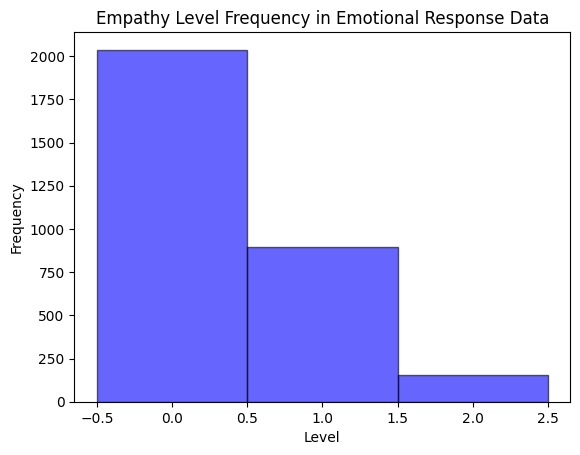

In [ ]:
plt.hist(em_df['level'], color='blue', edgecolor='black', bins=[0,1,2,3], alpha=0.6, align='left', range=[0,2])
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.title('Empathy Level Frequency in Emotional Response Data')
print('We can see that we definitely have unbalanced data. TODO talk to Mark about this? It could be a case to just try to determine rationales instead of predicting empathy level.')

# Back Translation
Reference: https://dzlab.github.io/dltips/en/pytorch/text-augmentation/

In [ ]:
!pip install transformers
!pip install mosestokenizer
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.5 MB/s eta 0:00:00


In [ ]:
model_name = "Helsinki-NLP/opus-mt-en-ROMANCE"
tokenizer = MarianTokenizer.from_pretrained(model_name)

model = MarianMTModel.from_pretrained(model_name)
translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))
tgt_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Helper function to download data for a language
def download(model_name):
  tokenizer = MarianTokenizer.from_pretrained(model_name)
  model = MarianMTModel.from_pretrained(model_name)
  return tokenizer, model

# download model for English -> Romance
tmp_lang_tokenizer, tmp_lang_model = download('Helsinki-NLP/opus-mt-en-ROMANCE')
# download model for Romance -> English
src_lang_tokenizer, src_lang_model = download('Helsinki-NLP/opus-mt-ROMANCE-en')


def translate(texts, model, tokenizer, language):
  """Translate texts into a target language"""
  # Format the text as expected by the model
  formatter_fn = lambda txt: f"{txt}" if language == "en" else f">>{language}<< {txt}"
  original_texts = [formatter_fn(txt) for txt in texts]

  # Tokenize (text to tokens)
  tokens = tokenizer.prepare_seq2seq_batch(original_texts)

  # Translate
  translated = model.generate(**tokens)

  # Decode (tokens to text)
  translated_texts = tokenizer.batch_decode(translated, skip_special_tokens=True)

  return translated_texts

def back_translate(texts, language_src, language_dst):
  """Implements back translation"""
  # Translate from source to target language
  translated = translate(texts, tmp_lang_model, tmp_lang_tokenizer, language_dst)

  # Translate from target language back to source language
  back_translated = translate(translated, src_lang_model, src_lang_tokenizer, language_src)

  return back_translated

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
src_texts = 'I might be late tonight'
back_texts = back_translate(src_texts, "en", "fr")

print(back_texts)
# ['I might be late tonight.', 'What a movie, so bad', 'That was very kind of you.']

In [ ]:
!pip install datsets transformers[sentencepiece]
!pip install sentencepiece

ERROR: Could not find a version that satisfies the requirement datsets (from versions: none)
ERROR: No matching distribution found for datsets


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

src_text = [
    ">>fr<< this is a sentence in english that we want to translate to french",
    ">>pt<< This should go to portuguese",
    ">>es<< And this to Spanish",
]

model_name = "Helsinki-NLP/opus-mt-en-ROMANCE"
tokenizer = MarianTokenizer.from_pretrained(model_name)

model = MarianMTModel.from_pretrained(model_name)
translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))
tgt_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

In [ ]:
tgt_text

["c'est une phrase en anglais que nous voulons traduire en français",
 'Isto deve ir para o português.',
 'Y esto al español']

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
import sentencepiece

# download model for English -> Romance
tmp_lang_model_name = 'Helsinki-NLP/opus-mt-en-ROMANCE'
tmp_lang_tokenizer = MarianTokenizer.from_pretrained(tmp_lang_model_name)
tmp_lang_model = MarianMTModel.from_pretrained(tmp_lang_model_name)

# tmp_lang_tokenizer, tmp_lang_model = download('Helsinki-NLP/opus-mt-en-ROMANCE')
# # download model for Romance -> English
# src_lang_tokenizer, src_lang_model = download('Helsinki-NLP/opus-mt-ROMANCE-en')

src_lang_model_name = 'Helsinki-NLP/opus-mt-ROMANCE-en'
src_lang_tokenizer = MarianTokenizer.from_pretrained(src_lang_model_name)
src_lang_model = MarianMTModel.from_pretrained(src_lang_model_name)

In [ ]:
# google sheets - translate col
# downsample the most common
# change to binary class and predict empathy vs no empahty
# don't translate seeker post
# include seeker and response into bert
# no rationale - cheating
# predict empathy level and rationale at same time - need to add in rationale for no empathy
# how do we measure accuracy rationale predictions - multiclass classification problem
# no softmax, sigmoid - prob for each class
# - look up multilabel classification
# - potentially classification reprot and confusion matrix - check A3
# - report precisioin and recall

# rational extraction -
# rationale - binary classification
# named entity recognition approcah - bio tagging
# run everything through tokenizer to get label O for outside
# b tag inside rationale, i for insde, o for outside

def translate(texts, model, tokenizer, language):
    """Translate texts into a target language"""
    # Format the text as expected by the model
    formatter_fn = lambda txt: f"{txt}" if language == "en" else f">>{language}<< {txt}"
    original_texts = [formatter_fn(txt) for txt in texts]

    # Tokenize (text to tokens)
    #   tokens = tokenizer.prepare_seq2seq_batch(original_texts)

    # Translate
    translated = model.generate(**tokenizer(original_texts, return_tensors="pt", padding=True))

    # Decode (tokens to text)
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

    return translated_texts

def back_translate(texts, language_src, language_dst):
    print(texts)
    """Implements back translation"""
    # Translate from source to target language
    translated = translate(texts, tmp_lang_model, tmp_lang_tokenizer, language_dst)

    # Translate from target language back to source language
    back_translated = translate(translated, src_lang_model, src_lang_tokenizer, language_src)

    return back_translated

In [ ]:
def augment_data(df, column, language):
    print(df.shape)

    back_translated_list = back_translate(df[column].to_list(), language_src='en', language_dst='es')

    return back_translated_list

back_translated_df = augment_data(em_df[em_df['level'] > 0].head(3), 'response_post', 'es')

(3, 14)
["Is that really so bad? Maybe it was the smart decision because you needed that time to read recover. You're being kind to yourself when you need it and that's important. Hope you feel better soon.", "I don't want you to jump. I don't want you to die, in either one. I don't know exactly what you're going through but from the sounds of it, I'd suggest focusing on the parts in your life that you enjoy.", 'sorry to hear that, but been in a similar situation after taking some time off of school. My best advice is to take the minimum amount of classes possible so you get too overwhelmed. For me essential to plan my assignments in advance, so that I can just do things one by one and not let it all get piled up cuz then I wanna die. Also, if you need a break, take one. School will always be there but good to take care of yourself too :)']


In [ ]:
em_df[em_df['level'] > 0].head(3)['response_post'].to_list()

["Is that really so bad? Maybe it was the smart decision because you needed that time to read recover. You're being kind to yourself when you need it and that's important. Hope you feel better soon.",
 "I don't want you to jump. I don't want you to die, in either one. I don't know exactly what you're going through but from the sounds of it, I'd suggest focusing on the parts in your life that you enjoy.",
 'sorry to hear that, but been in a similar situation after taking some time off of school. My best advice is to take the minimum amount of classes possible so you get too overwhelmed. For me essential to plan my assignments in advance, so that I can just do things one by one and not let it all get piled up cuz then I wanna die. Also, if you need a break, take one. School will always be there but good to take care of yourself too :)']

In [ ]:
back_translated_df

["Is that really so bad? Maybe it was the smart decision because you needed that time to read to recover. You're being nice to yourself when you need it and that's important. I hope you feel better soon.",
 "I don't want you to die on either of us. I don't know exactly what you're going through, but by the sounds of that, I suggest you focus on the parts of your life you enjoy.",
 "I'm sorry to hear that, but I was in a similar situation after taking some time out of school. My best advice is to take the minimum amount of classes possible so that you get too burdened. For me essential to plan my assignments in advance, so that I can only do things one by one and not let everything pile up then I want to die. Also, if you need a break, take one. The school will always be there but good to take care of yourself as well :)"]

In [ ]:
src_text = [
    "this is a sentence in english that we want to translate to french",
    "This should go to portuguese",
    "And this to Spanish",
]

# src_texts = 'I might be late tonight'
back_texts = back_translate(src_text, "en", "es")

In [ ]:
back_texts

['this is a phrase in English that we want to translate into French',
 'This should go to the Portuguese.',
 'And this is Spanish.']

In [ ]:
translate(src_text, tmp_lang_model, tmp_lang_tokenizer, 'es')

['esta es una frase en inglés que queremos traducir al francés',
 'Esto debería ir al portugués.',
 'Y esto al español']

In [ ]:
filtered_rows = em_df[em_df['level'] > 0]

In [ ]:
filtered_rows['response_post'].to_list()

["Is that really so bad? Maybe it was the smart decision because you needed that time to read recover. You're being kind to yourself when you need it and that's important. Hope you feel better soon.",
 "I don't want you to jump. I don't want you to die, in either one. I don't know exactly what you're going through but from the sounds of it, I'd suggest focusing on the parts in your life that you enjoy.",
 'sorry to hear that, but been in a similar situation after taking some time off of school. My best advice is to take the minimum amount of classes possible so you get too overwhelmed. For me essential to plan my assignments in advance, so that I can just do things one by one and not let it all get piled up cuz then I wanna die. Also, if you need a break, take one. School will always be there but good to take care of yourself too :)',
 "Hey, just wait it out. I know what you feel. Sometimes I think I'm attractive, and sometimes I can't even look at myself I'm so disgusted. I've come to

In [ ]:
filtered_rows['response_post'].apply

,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
7,7oi3es,ds9oti2,I called in sick to work today. For the first ...,Is that really so bad? Maybe it was the smart ...,1,Hope you feel better soon|,249,196,52,36,[170],[25],[5],[195]
9,7gipvi,dqje246,i wanna jump from an elevated place. i wanna k...,I don't want you to jump. I don't want you to ...,1,I don't want you to jump. I don't want you to ...,372,202,72,41,[0],[49],[12],[49]
12,7vs790,dtuopol,I've had a hard time going back to school. Goi...,"sorry to hear that, but been in a similar situ...",2,sorry to hear that|,559,434,114,88,[0],[18],[4],[18]
14,ab2lkb,ecx2gco,All the people who will be kissed on New year'...,"Hey, just wait it out. I know what you feel. S...",1,if you ever wanna talk about anything I'd be m...,266,950,48,176,[884],[63],[13],[947]
18,5xea9y,dehmbgx,"The world is really pretty.. Pity, that I won'...","You're a good man, Median. I hope you know thi...",1,"You're a good man|I'd rather you live, persona...",79,232,15,45,"[0, 200]","[17, 32]","[4, 5]","[17, 232]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,904s42,e2noi3p,days clean: 0. i was on a 2 month streak.,"Right there with you today.. stay strong, got ...",1,"Right there with you today.. stay strong, got ...",41,51,10,9,[0],[51],[9],[51]
3073,5xtisn,dekpofh,Why am I so fucked up?. I just bombed my bio t...,Talk to your teacher. Sometimes they're willin...,1,One test will not ruin your life. I promise. :)|,217,296,45,54,[249],[47],[10],[296]
3076,8lfufr,dzfd8cg,How do you handle people that pray on your dep...,Here is the thing. If you open up to these peo...,1,Believe me there is a friend out there who is ...,281,809,48,156,[505],[209],[41],[714]
3078,4dydd1,d1vi4c7,I need a hug. I fucked up so bad. Thinking abo...,*hug* Whatever the situation is that's causing...,2,*hug* Whatever the situation is that's causing...,115,125,26,19,[0],[125],[19],[125]


In [ ]:
print(tmp_lang_tokenizer.supported_language_codes)

['>>fr<<', '>>es<<', '>>it<<', '>>pt<<', '>>pt_br<<', '>>ro<<', '>>ca<<', '>>gl<<', '>>pt_BR<<', '>>la<<', '>>wa<<', '>>fur<<', '>>oc<<', '>>fr_CA<<', '>>sc<<', '>>es_ES<<', '>>es_MX<<', '>>es_AR<<', '>>es_PR<<', '>>es_UY<<', '>>es_CL<<', '>>es_CO<<', '>>es_CR<<', '>>es_GT<<', '>>es_HN<<', '>>es_NI<<', '>>es_PA<<', '>>es_PE<<', '>>es_VE<<', '>>es_DO<<', '>>es_EC<<', '>>es_SV<<', '>>an<<', '>>pt_PT<<', '>>frp<<', '>>lad<<', '>>vec<<', '>>fr_FR<<', '>>co<<', '>>it_IT<<', '>>lld<<', '>>lij<<', '>>lmo<<', '>>nap<<', '>>rm<<', '>>scn<<', '>>mwl<<']
